In [599]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import random as rand
import sklearn.linear_model as lm

# Introduction

Neural networks are a type of machine learning algorithms developped to solved classification or regression problem. They mimic the way our humain brain works.

Let's go in the shoes of a brillant doctor (if you are a TV show savvy like me, you can choose to be Dr House, Dr Aaron Glassman or Dr Cristina Yang) and explain how the brain works. The brain is a collection of neurons linked with one another. They are composed with multiple ***dentrites*** and an ***axon***. those elements allow the neurons to be connected to each other. The physical location where the neurons are connected is called ***synapses***. The intensity of this connection is variable.

To put it in a nutshell, a neuron transmits information to an other neuron through the connection axon/dentrites and this connection is as strong as the synapses. The inputs are taken through the dentrites which ***activates*** the neuron and when the neuron is activated, it transmits information to another neuron via its axon.

![](maxresdefault.jpg)

Those notions are important for themselves. But if I put you in the shoes of a physicist, it is not just for the pleasure of the experience. I think it will give a good background for the remainder of this exposé. If you are interested to know how the machine learning and the neuroscience are intertwined, I recommand you to read [this article](http://www.columbia.edu/cu/appliedneuroshp/Papers/out.pdf)

# A traditional machine learning model: Logistic Regression Classifier

## Classical representation of the Logistic Regression

The Logistic Regression Classifier (LRC) is used to make predictions on binary variable. In this section, I want to represent the LRC as a neuron or, more precisely, as a perceptron. But first, what is the standard representation of the LCR? (It will get a bit theoretical but bear with me, it is for the higher good)

Let's suppose, we have a set $\{(\hat{X}_i,\hat{y}_i), i \in [[0,n]]\}$ such as $\forall i, \hat{y}_i \in \{0,1\}$ and $\hat{X}_i \in R^m$.
We would expect that a "machine learns" on this dataset means that we find a function $f_\theta$ such as:
$$\forall i \in [[0,n]], f_\theta (\hat{X}_i) = \hat{y}_i$$
However, there are many things wrong (or too optimistic, to put it mildly) with this expectation. let's take two points:

1. **Lack of Generalisation**: The goal of a machine learning model is not to avoid mistakes but to estimate the general rule which explain the output ($y_i$) from the input ($X_i$). This general rule is only partially defined by the observed dataset because there is a noise in the measure, which means, instead of observing the true $(X_i,y_i)$ we have a noisy $(\hat{X}_i,\hat{y}_i)$
2. **Smoothness**: The function $f_\theta$ is defined as a function from $R^m$ to $\{0,1\}$. So this function is not continuous. However, to ease the computation endeavor to calibrate (or identify) the parameter $\theta$ some level of smoothness is needed.

So, in the Logistic Regression framework, we will say that "the machine has learned" when it finds the parameter $\theta$ which minimizes:
$$ J(\theta) = - \frac{1}{n}\sum_{i=1}^{n} \bigg(y_i.log(f_\theta{}(X_i))+(1-y_i)log(1-f_\theta{}(X_i))\bigg) $$

$J$ is called the cost function. Hence, instead of trying to have an equality between the estimate and the observed value, we try to reduce the cost (or the error) to a minimum. This will allow our machine to have a better generalisation power.

Moreover, $f_\theta$ does not try to replicate the output, per se. Instead, it will try to estimate the probability of an observation having $y=1$. $f_\theta$ is the sigmoid function:
$$f_\theta(X)=\frac{1}{1+e^{-X\theta^T}}$$

So, the cost function and the sigmoid function resolve our two issues (lack of generalisation and smoothness).

All this is a bit theoretical, but with this understanding, we are already equiped to do some interpretations. If we assume $P(Y=1|X)=\frac{1}{1+e^{-X\theta^T}}$ (as the LRC does), the risk ratio 1/0 is $Ratio_{1/0}(X):=\frac{P(Y=1|X)}{P(Y=0|X)}=\frac{P(Y=1|X)}{1-P(Y=1|X)}=e^{X\theta^T}$

therefore, $$\frac{1}{Ratio_{1/0}}\times\frac{\partial Ratio_{1/0}}{\partial X}=\theta^T$$

TADA! This equation says that the relative increase of the risk with a slight increase of $X$ is $\theta^T$

In [600]:
def sigmoid(X,theta):
    """ computation of a sigmoid: X is the matrix of characteristics (row: observations. columns:characteristics)
    theta is the parameter (1 row)"""
    res = X.dot(theta.T)
    res = 1/(1+np.exp(-res))
    return res

In [601]:
X_ex = np.matrix(np.linspace(-100,100)).T
theta = np.matrix([0.25])
sig = sigmoid(X_ex,theta)

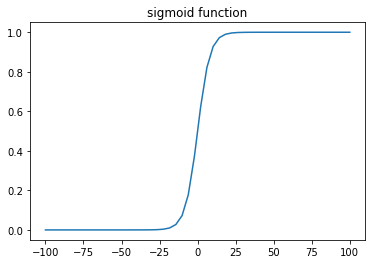

In [602]:
plt.figure()
plt.plot(X_ex,sig)
plt.title("sigmoid function")
plt.show()

## Neural network representation

In the last section, we saw the classic representation of the LCR and how to interpret the parameter. In this section, I want make a link between the neuroscience experience we did (remember? Dr Aaron Glassman taking a look in the function of the neuron?) and the logistic regression model.

Just as a remainder, for the LRC, We have $P(Y=1|X)=\frac{1}{1+e^{-X\theta^T}}$.

Now let's suppose that an imaginary (or artificial ;) ) neuron receives a number of inputs through the synapses it has with other. For each flow of input $i$ and each synapses $j$, the information $X_{i,j}$ is attenuated or strenghtened by the synapses $j$. Hence, the neuron receives the information $X_{i,j}\times\theta_j$. 
The activation neuron unleashes a flow of information. In order to join the LCR and the function of the neuron, the information transmitted is $f_\theta(X_i)$: $f_\theta$ is called the **activation** function.

To sum up:
1. One flow of input $i$ is an observation of our dataset ($X_{i}$)
2. Each dendrite $j$ is capable to capture one characteristic ($X_{.,j}$)
3. The dendrite has a synapse which strengthens by $\theta_j$ the information $X_{i,j}$
4. The activation function is the sigmoid function in the case of LRC

Great! The circle is almost complete! We now have to understand how the machine learns. Really! How do we estimate the vector $\theta$ (Hint: gradient descent :) )

## Calibration process

### Gradient descent

In [603]:
dataset_1 = pd.read_csv("Datasets/ex2data1.txt",header=None,names=["Exam 1 score","Exam 2 score","Admission"])
feature_trick =np.repeat(1,dataset_1.shape[0])
dataset_1.insert(0,"bias",feature_trick)

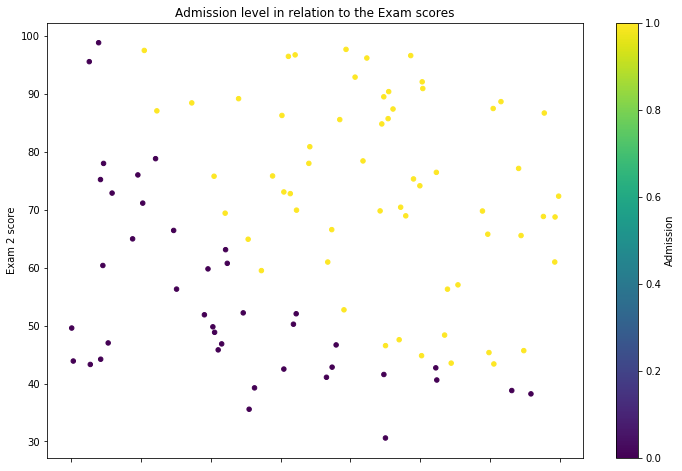

In [604]:
ax = dataset_1.plot.scatter(x="Exam 1 score",y="Exam 2 score",c="Admission",colormap='viridis',figsize=(12,8))
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.set_title("Admission level in relation to the Exam scores")
plt.show()

In [605]:
dataset_1.head()

,bias,Exam 1 score,Exam 2 score,Admission
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [606]:
def cost_function(X,y,theta):
    """X is the matrix of characteristics (row: observations. columns:characteristics)
    theta is the parameter (1 row)"""
    m = X.shape[0]
    
    activation_info = sigmoid(X,theta)
    #print(activation_info)
    term_A = np.multiply(np.log(activation_info),y)
    term_B = np.multiply(1-y,np.log(1-activation_info))
    
    res = -(1/m)*(sum(term_A)+sum(term_B))
    res=res[0,0]
    return(res)

In [607]:
def derivate_cost(X,y,theta):
    m=X.shape[0]
    activation_info = sigmoid(X,theta)
    res = -(1/m)*((y-activation_info).T.dot(X))
    return(res)

In [608]:
def gradient_descent(X,y,theta_init,learning_rate,iter_limit=2):
    
    theta_temp=theta_init
    columns_theta = ['theta_'+str(x) for x in range(0,theta_init.shape[1])]
    costs=[cost_function(X,y,theta_init)]
    thetas=pd.DataFrame(theta_init,columns=columns_theta)
    i=0
    while i<iter_limit:
        theta_temp=theta_temp - learning_rate*derivate_cost(X,y,theta_temp)
        costs.append(cost_function(X,y,theta_temp))

        thetas=pd.concat([thetas,pd.DataFrame(theta_temp,columns=columns_theta)],ignore_index=True)
        i=i+1
    
    return({"theta_final":theta_temp,"costs":costs,"thetas":thetas})


In [609]:
data=np.matrix(dataset_1.loc[:,["Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix([0.25,0.11])

cost_function(X = data,y=target,theta=theta)

7.606526309794523

In [610]:
derivate_cost(X = data,y=target,theta=theta)

matrix([[20.81291666, 21.8481514 ]])

In [611]:
data=np.matrix(dataset_1.loc[:,["bias","Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix([90,-1,-1])

test =gradient_descent(X=data,y=target,theta_init=theta,learning_rate=0.000006,iter_limit=1000)

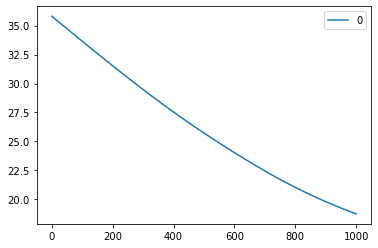

In [612]:
pd.DataFrame(test["costs"]).plot.line()
plt.show()

In [613]:
X= range(30,100)
b= - test["thetas"].iloc[-1,:].theta_0/test["thetas"].iloc[-1,:].theta_2
a= -test["thetas"].iloc[-1,:].theta_1/test["thetas"].iloc[-1,:].theta_2
y = [b + x*a for x in X]

In [614]:
LR = lm.LogisticRegression()
LR.fit(X=dataset_1.loc[:,["Exam 1 score","Exam 2 score"]],y=dataset_1.loc[:,"Admission"])
a1=-LR.coef_[0,0]/LR.coef_[0,1]
b1=-LR.intercept_/LR.coef_[0,1]
y1 = [b1 + x*a1 for x in X]

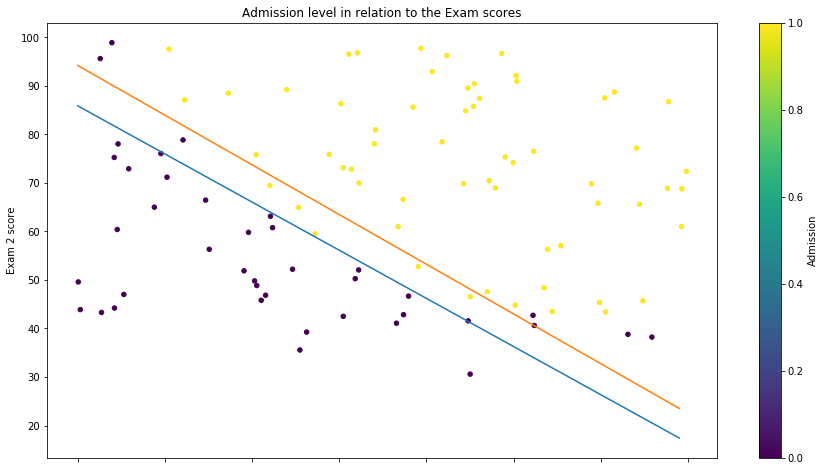

In [615]:
ax = dataset_1.plot.scatter(x="Exam 1 score",y="Exam 2 score",c="Admission",colormap='viridis',figsize=(15,8))
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.set_title("Admission level in relation to the Exam scores")

plt.plot(X,y)
plt.plot(X,y1)
plt.show()

In [616]:
data=np.matrix(dataset_1.loc[:,["bias","Exam 1 score","Exam 2 score"]])
target=np.matrix(dataset_1.Admission).T
theta = np.matrix(test["thetas"].iloc[899,:])

cost_function(X = data,y=target,theta=theta)

19.82036676482963